# Importing Libraries

In [33]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

# Loading the dataset

In [34]:
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

# **Exploratory Data Analysis**

## **Data Overview and Data Summary**

In [35]:
df.shape

(953, 24)

In [36]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


**Explanation of Features:**

* track_name: Name of the song
* artist(s)_name: Name of the artist(s) of the song
* artist_count: Number of artists contributing to the song
* released_year: Year when the song was released
* released_month: Month when the song was released
* released_day: Day of the month when the song was released
* in_spotify_playlists: Number of Spotify playlists the song is included in
* in_spotify_charts: Presence and rank of the song on Spotify charts
* streams: Total number of streams on Spotify
* in_apple_playlists: Number of Apple Music playlists the song is included in
* in_apple_charts: Presence and rank of the song on Apple Music charts
* in_deezer_playlists: Number of Deezer playlists the song is included in
* in_deezer_charts: Presence and rank of the song on Deezer charts
* in_shazam_charts: Presence and rank of the song on Shazam charts
* bpm: Beats per minute, a measure of song tempo
* key: Key of the song
* mode: Mode of the song (major or minor)
* danceability_%: Percentage indicating how suitable the song is for dancing
* valence_%: Positivity of the song's musical content
* energy_%: Perceived energy level of the song
* acousticness_%: Amount of acoustic sound in the song
* instrumentalness_%: Amount of instrumental content in the song
* liveness_%: Presence of live performance elements
* speechiness_%: Amount of spoken words in the song

In [37]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [38]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [39]:
df["in_deezer_playlists"] = df["in_deezer_playlists"].str.replace(',', '').astype(int)
df["in_shazam_charts"] = df["in_shazam_charts"].str.replace(',', '')

# Convert falsely assigned categorical columns to numerical
categorical_columns = ['track_name', 'artist(s)_name', 'key', 'mode']
for col in df.columns:
    if col not in categorical_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [40]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

In [42]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,953.000000,953.000000,903.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,385.187828,2.666317,59.995570,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,1130.535561,6.035599,161.161093,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,13.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,44.000000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,164.000000,2.000000,37.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,58.000000,1451.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [43]:
result = df.select_dtypes(include=['number']).agg(['mean', 'median', lambda x: x.mode().iat[0]], axis=0)
result.index = ['mean', 'median', 'modus']
result

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,385.187828,2.666317,59.99557,122.540399,66.96957,51.43127,64.279119,27.057712,1.581322,18.213012,10.131165
median,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,44.000000,0.000000,2.00000,121.000000,69.00000,51.00000,66.000000,18.000000,0.000000,12.000000,6.000000
modus,1.000000,2022.000000,1.000000,1.000000,86.000000,0.000000,1.563386e+08,0.000000,0.000000,0.000000,0.000000,0.00000,120.000000,70.00000,24.00000,74.000000,0.000000,0.000000,11.000000,4.000000


In [44]:
df.describe(include=['object'])

,track_name,artist(s)_name,key,mode
count,953,953,858,953
unique,943,645,11,2
top,Daylight,Taylor Swift,C#,Major
freq,2,34,120,550


## **Univariate Analysis**

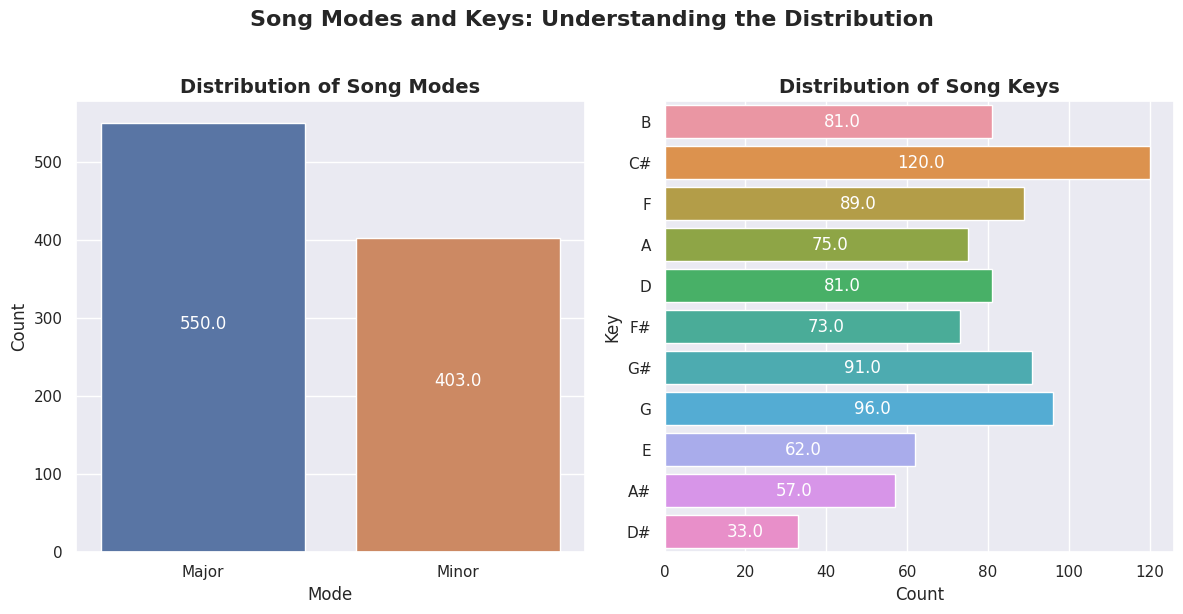

In [45]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot and customize the first subplot (Distribution of Song Modes)
sns.countplot(ax=axes[0], data=df, x="mode")
axes[0].set_title("Distribution of Song Modes", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Mode")
axes[0].set_ylabel("Count")

for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                    ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points', color='white')

# Plot and customize the second subplot (Distribution of Song Keys)
sns.countplot(ax=axes[1], data=df, y="key")
axes[1].set_title("Distribution of Song Keys", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Key")

for p in axes[1].patches:
    axes[1].annotate(f'{p.get_width()}',
                    (p.get_width() / 2, p.get_y() + p.get_height() / 2.),
                    ha='center', va='center', xytext=(10, 0),
                    textcoords='offset points', color='white')

# Add a more informative title for the entire figure
fig.suptitle("Song Modes and Keys: Understanding the Distribution", fontsize=16,
             y=1.02, fontweight='bold')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


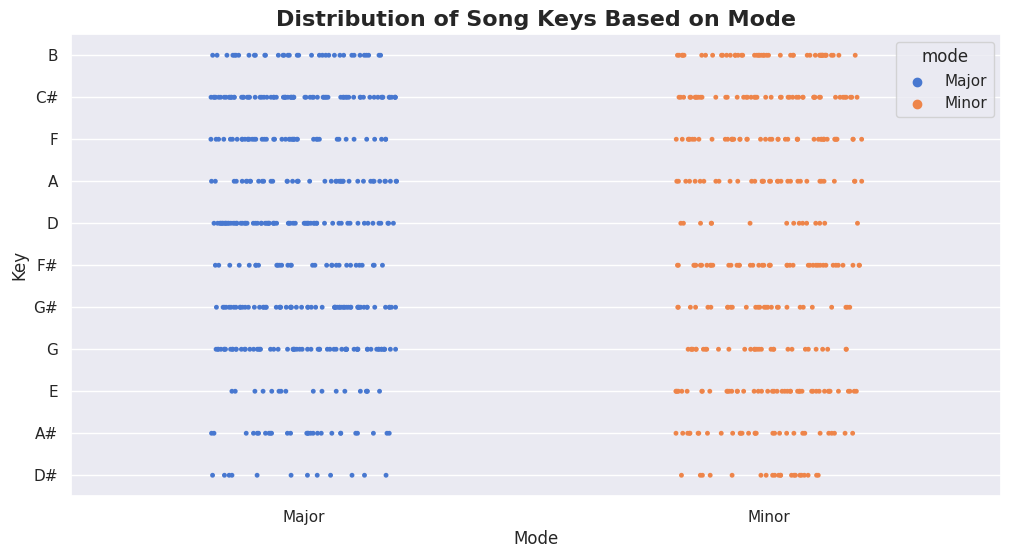

In [46]:
# Set up subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Create a strip plot using Seaborn for the distribution of song keys based on mode
sns.stripplot(data=df, x='mode', y='key', hue='mode', palette='muted', size=3.5, jitter=0.2, ax=ax)

# Set the title and axis labels
ax.set_title("Distribution of Song Keys Based on Mode", fontsize=16, fontweight='bold')
ax.set_xlabel("Mode")
ax.set_ylabel("Key")

# Display the plot
plt.show()

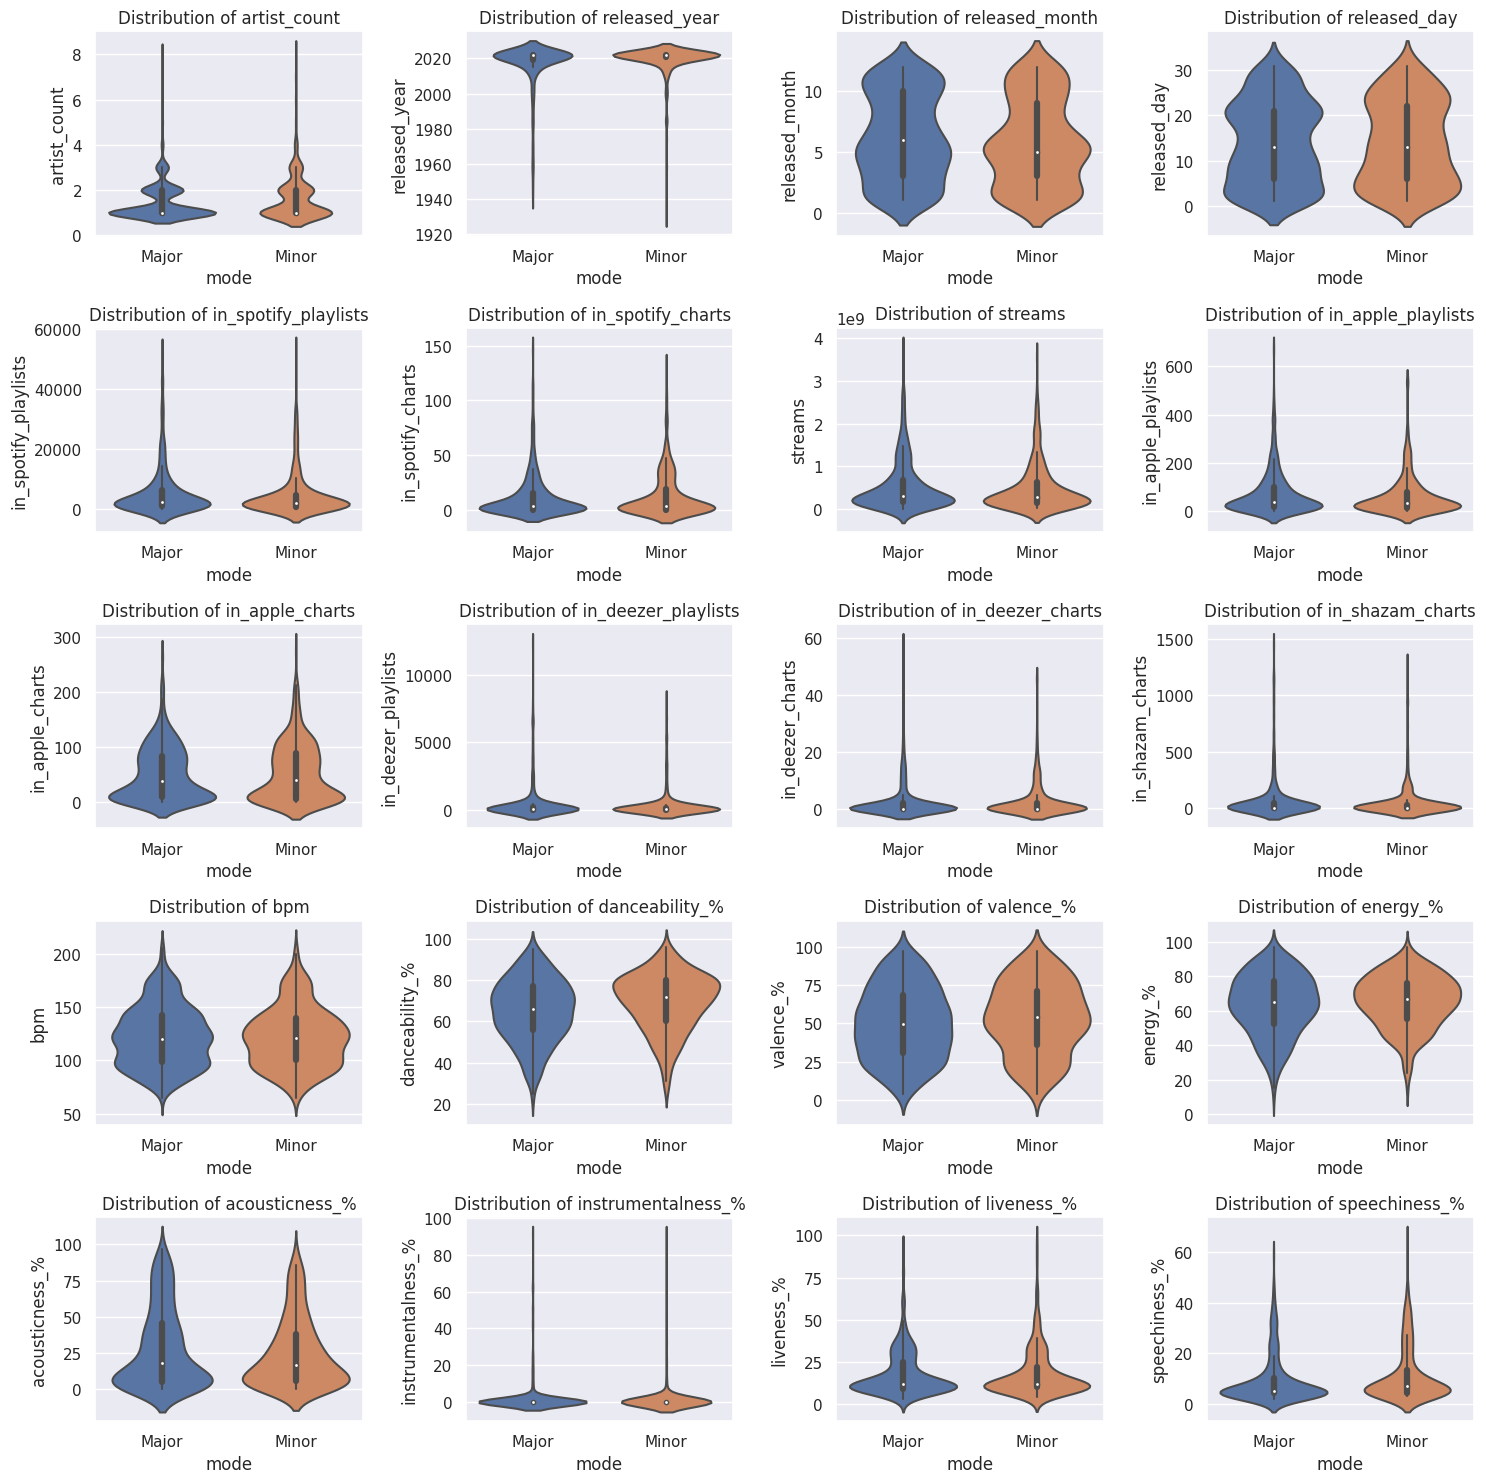

In [47]:
nfeatures = df.select_dtypes(exclude=['object']).columns.tolist()

plt.figure(figsize=(15, 15))
for i, col in enumerate(nfeatures, 1):
    plt.subplot(5, 4, i)
    sns.violinplot(data=df, x='mode', y=col)
    plt.title(f"Distribution of {col}")

# Show the plot
plt.tight_layout()
plt.show()

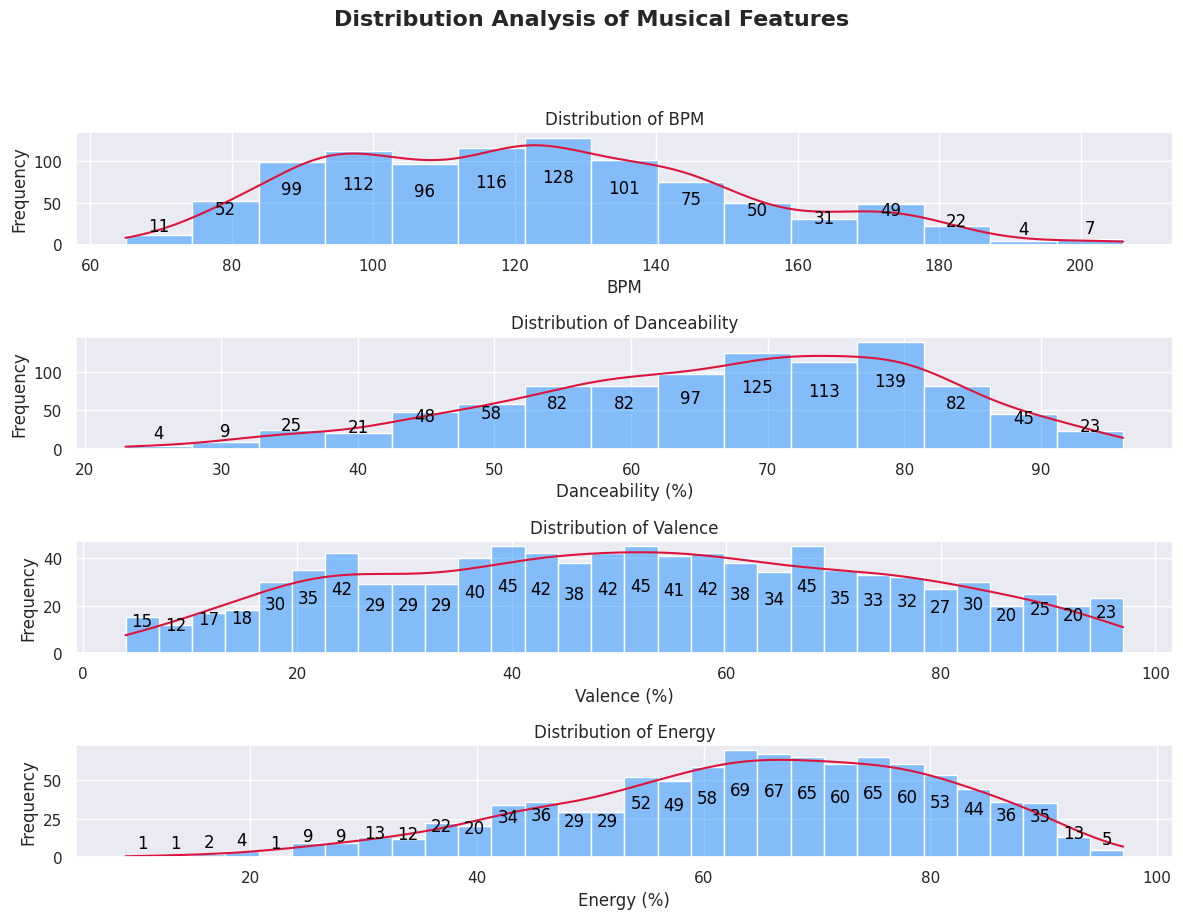

In [48]:
musical_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%']
labels = ['BPM', 'Danceability', 'Valence', 'Energy']
bins = [15, 15, 30, 30]

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 9))
fig.suptitle("Distribution Analysis of Musical Features",
             fontsize=16, y=1.02, fontweight='bold')

for i, ax in enumerate(axes):
  sns.histplot(ax=ax, data=df, x=musical_features[i], bins=bins[i],
               color='dodgerblue', kde=True)
  ax.lines[0].set_color('crimson')
  ax.set_title(f"Distribution of {labels[i]}")
  ax.set_xlabel(labels[i] + (' (%)' if i else ''))
  ax.set_ylabel("Frequency")

  for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', color='black')

# Adjust layout to prevent clipping of suptitle
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plot
plt.show()

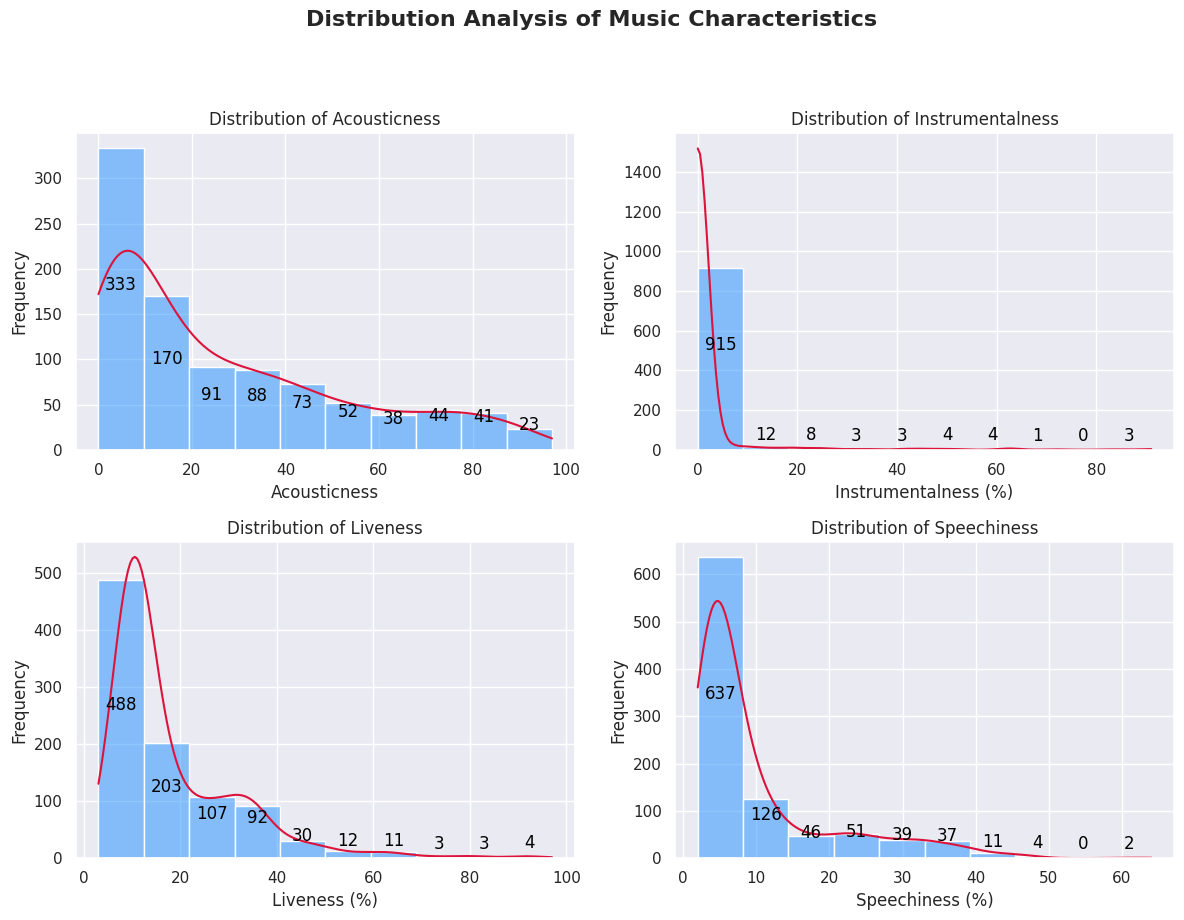

In [49]:
music_char = ['acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
labels = ['Acousticness', 'Instrumentalness', 'Liveness', 'Speechiness']
i = 0

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
fig.suptitle("Distribution Analysis of Music Characteristics",
             fontsize=16, y=1.02, fontweight='bold')

for row in axes:
  for ax in row:
    sns.histplot(ax=ax, data=df, x=music_char[i], bins=10,
                 color='dodgerblue', kde=True)
    ax.lines[0].set_color('crimson')
    ax.set_title(f"Distribution of {labels[i]}")
    ax.set_xlabel(labels[i] + (' (%)' if i else ''))
    ax.set_ylabel("Frequency")

    for p in ax.patches:
      ax.annotate(f'{p.get_height()}',
                  (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                  ha='center', va='center', xytext=(0, 10),
                  textcoords='offset points', color='black')
    i+=1

# Adjust layout to prevent clipping of suptitle
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plot
plt.show()

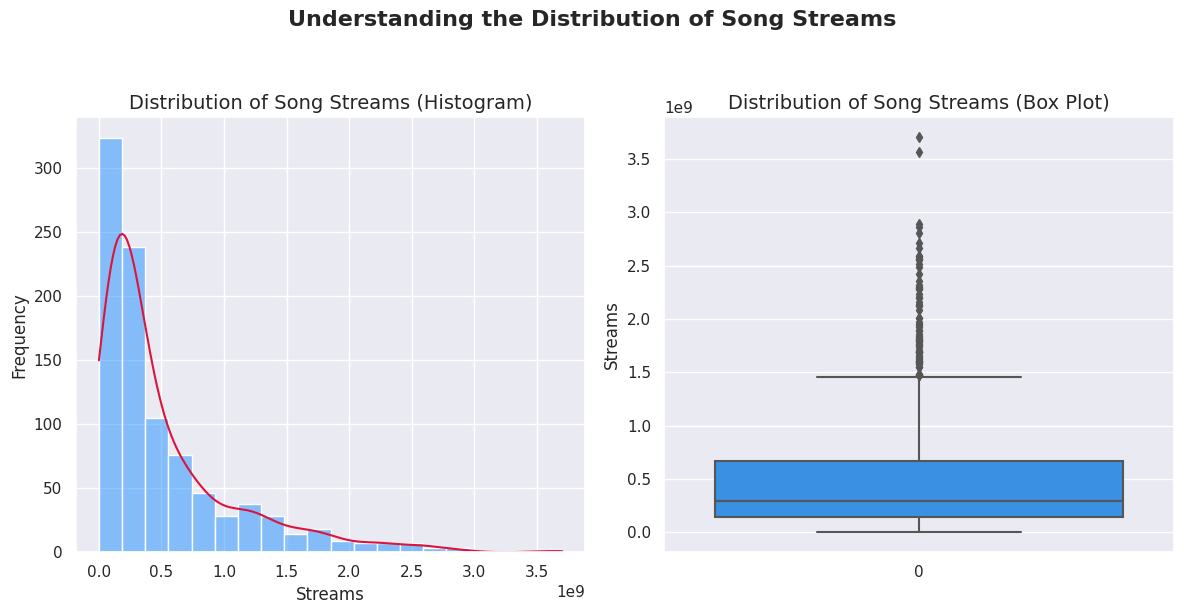

In [50]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for the distribution of streams
sns.histplot(df['streams'], bins=20, kde=True, color='dodgerblue', ax=axes[0])
axes[0].lines[0].set_color('crimson')
axes[0].set_title('Distribution of Song Streams (Histogram)', fontsize=14)
axes[0].set_xlabel('Streams')
axes[0].set_ylabel('Frequency')

# Plot box plot for the distribution of streams
sns.boxplot(df['streams'], ax=axes[1], color='dodgerblue',)
axes[1].set_title('Distribution of Song Streams (Box Plot)', fontsize=14)
axes[1].set_ylabel('Streams')

# Add a more informative title for the entire figure
fig.suptitle("Understanding the Distribution of Song Streams", fontsize=16,
             y=1.02, fontweight='bold')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

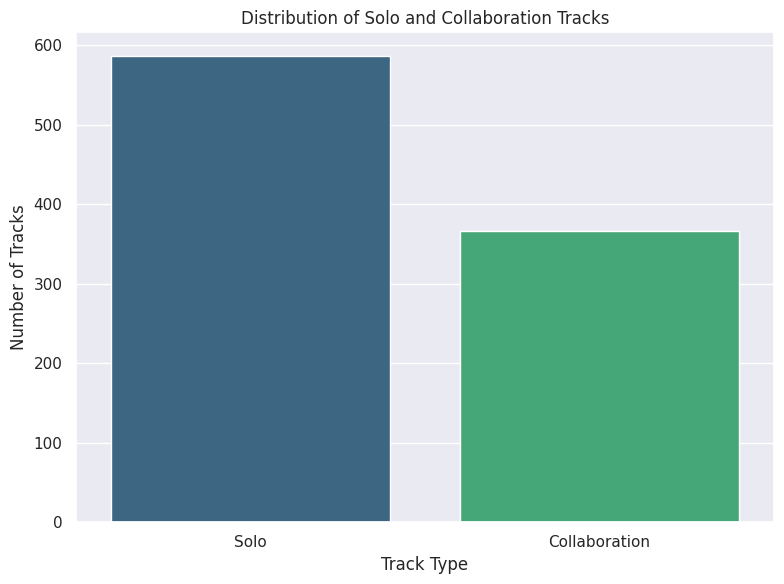

In [51]:
solo_songs = df[df['artist_count'] <= 1]
collaboration_tracks = df[df['artist_count'] > 1]

fig, ax = plt.subplots(figsize=(8, 6))

# Combine solo and collaboration data into a single DataFrame
combined_data = pd.DataFrame({
    'Track Type': ['Solo', 'Collaboration'],
    'Number of Tracks': [len(solo_songs), len(collaboration_tracks)],
})

# Plot using Seaborn barplot
sns.barplot(data=combined_data, x='Track Type', y='Number of Tracks',
            palette='viridis', ax=ax)


ax.set_xlabel('Track Type')
ax.set_ylabel('Number of Tracks')
ax.set_title('Distribution of Solo and Collaboration Tracks')

plt.tight_layout()
plt.show()

## **Bivariate Analysis**

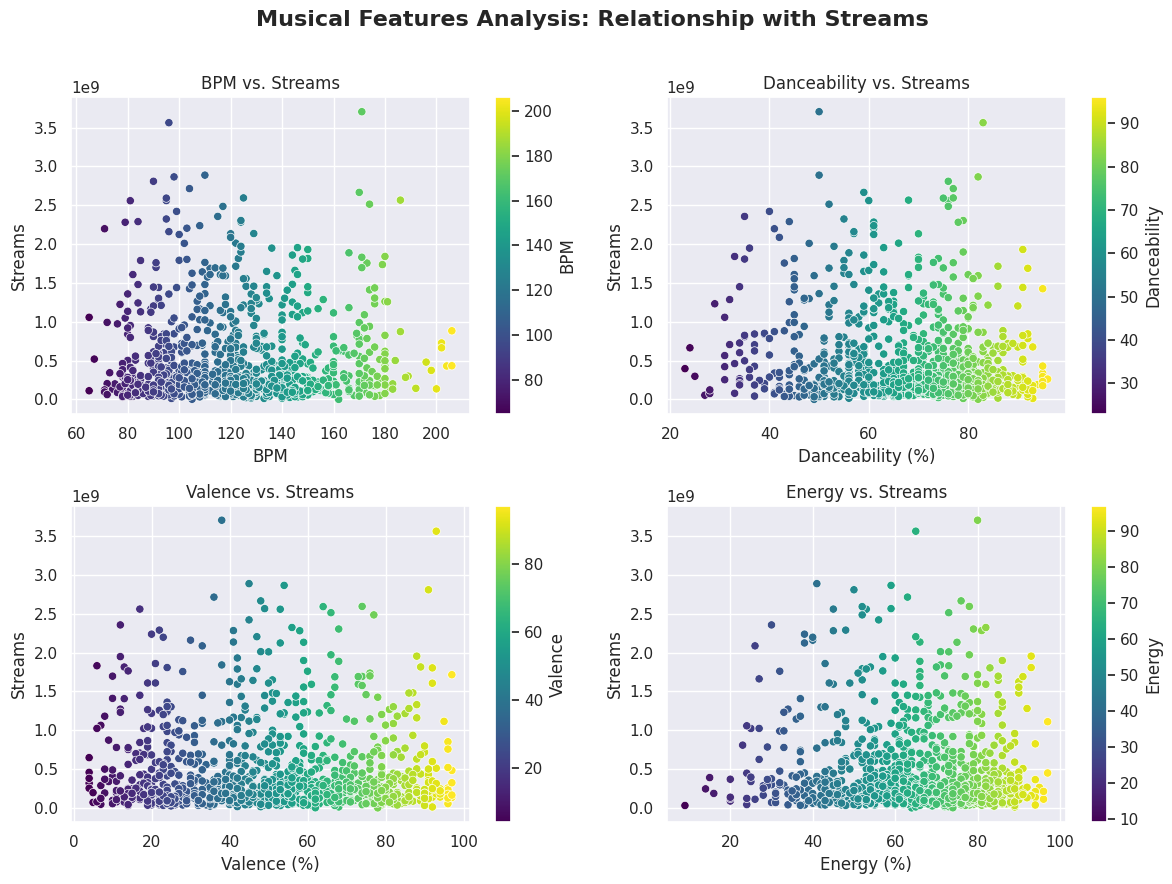

In [52]:

musical_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%']
labels = ['BPM', 'Danceability', 'Valence', 'Energy']
i = 0

fig, axes = plt.subplots(2, 2, figsize=(12, 9))
plt.suptitle("Musical Features Analysis: Relationship with Streams",
             fontsize=16, fontweight='bold')

for row in axes:
  for ax in row:
    plot = sns.scatterplot(ax=ax, data=df, x=musical_features[i], y="streams",
                          hue=musical_features[i], palette='viridis', legend=False)

    ax.set_title(f"{labels[i]} vs. Streams")
    ax.set_xlabel(labels[i] + (' (%)' if i else ''))
    ax.set_ylabel("Streams")

    norm = plt.Normalize(df[musical_features[i]].min(),
                         df[musical_features[i]].max())
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])

    cbar = ax.figure.colorbar(sm, ax=ax)
    cbar.set_label(labels[i])

    i += 1

# Adjust layout to prevent clipping of suptitle
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plot
plt.show()


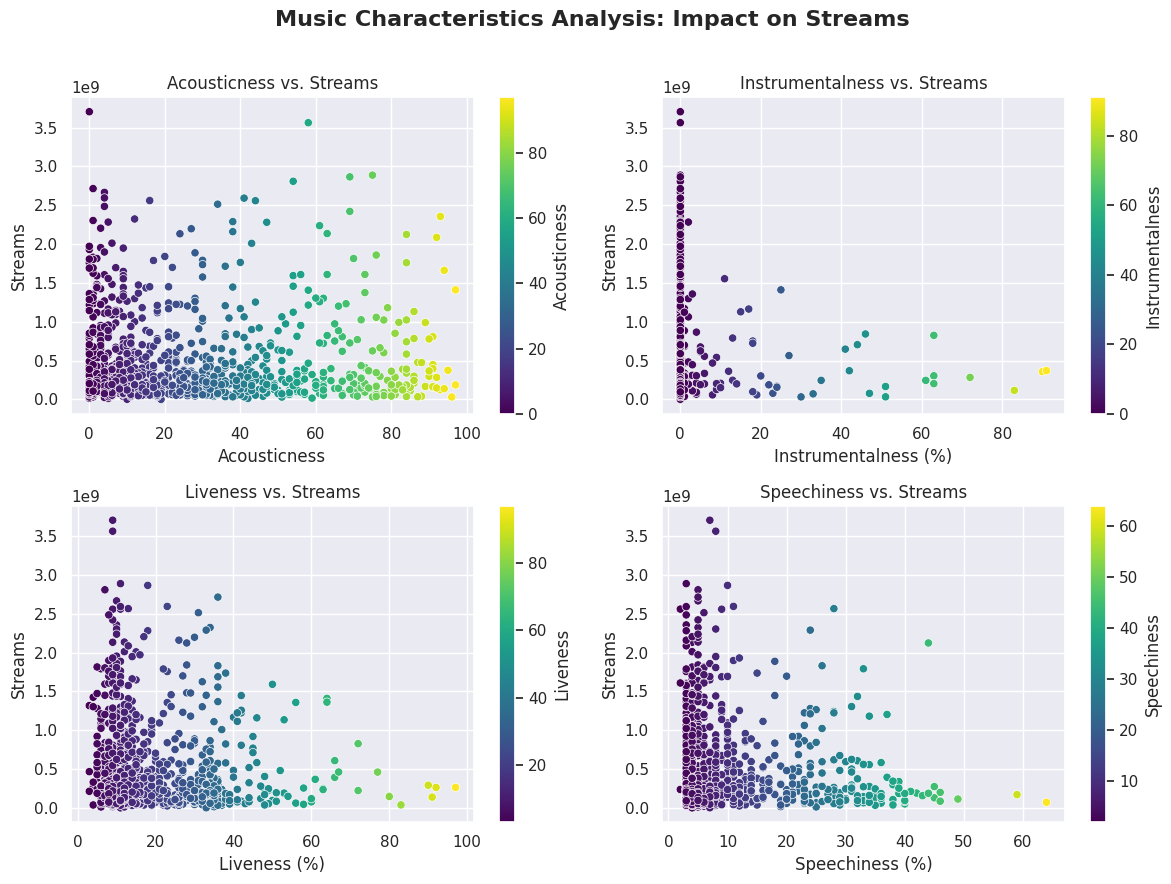

In [53]:
music_char = ['acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
labels = ['Acousticness', 'Instrumentalness', 'Liveness', 'Speechiness']
i = 0

fig, axes = plt.subplots(2, 2, figsize=(12, 9))
plt.suptitle("Music Characteristics Analysis: Impact on Streams",
             fontsize=16, fontweight='bold')

for row in axes:
  for ax in row:
    plot = sns.scatterplot(ax=ax, data=df, x=music_char[i], y="streams",
                          hue=music_char[i], palette='viridis', legend=False)

    ax.set_title(f"{labels[i]} vs. Streams")
    ax.set_xlabel(labels[i] + (' (%)' if i else ''))
    ax.set_ylabel("Streams")

    norm = plt.Normalize(df[music_char[i]].min(),
                         df[music_char[i]].max())
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])

    cbar = ax.figure.colorbar(sm, ax=ax)
    cbar.set_label(labels[i])

    i += 1

# Adjust layout to prevent clipping of suptitle
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plot
plt.show()


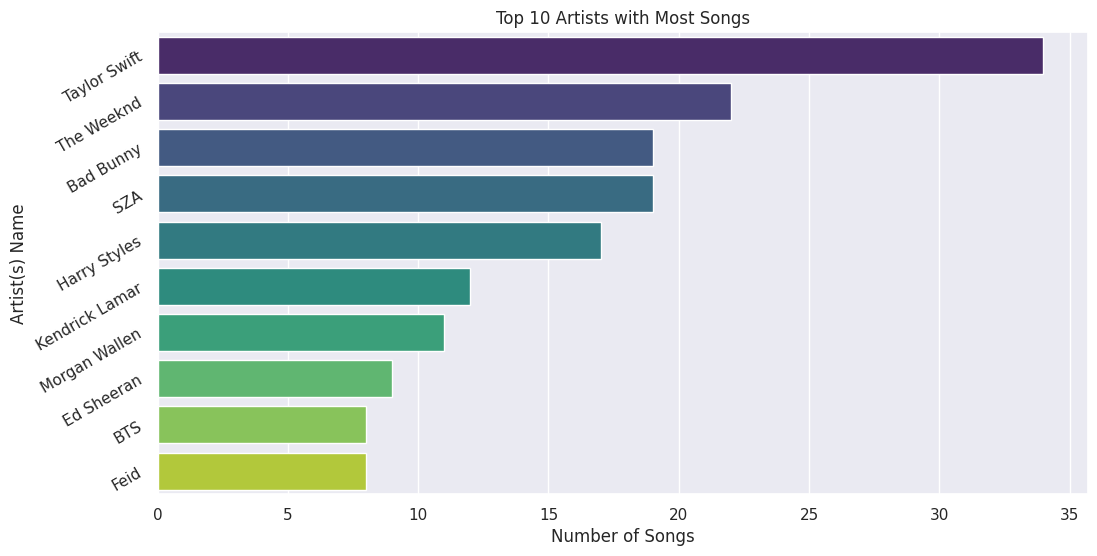

In [54]:
# Top 10 artists with most songs in the dataset
top_artists = df['artist(s)_name'].value_counts().head(10)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot using Seaborn barplot
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis', ax=ax)

# Set labels and title
ax.set_xlabel('Number of Songs')
ax.set_ylabel('Artist(s) Name')
ax.set_title('Top 10 Artists with Most Songs')
ax.set_yticklabels(ax.get_yticklabels(), rotation=30, ha='right')

# Show the plot
plt.show()

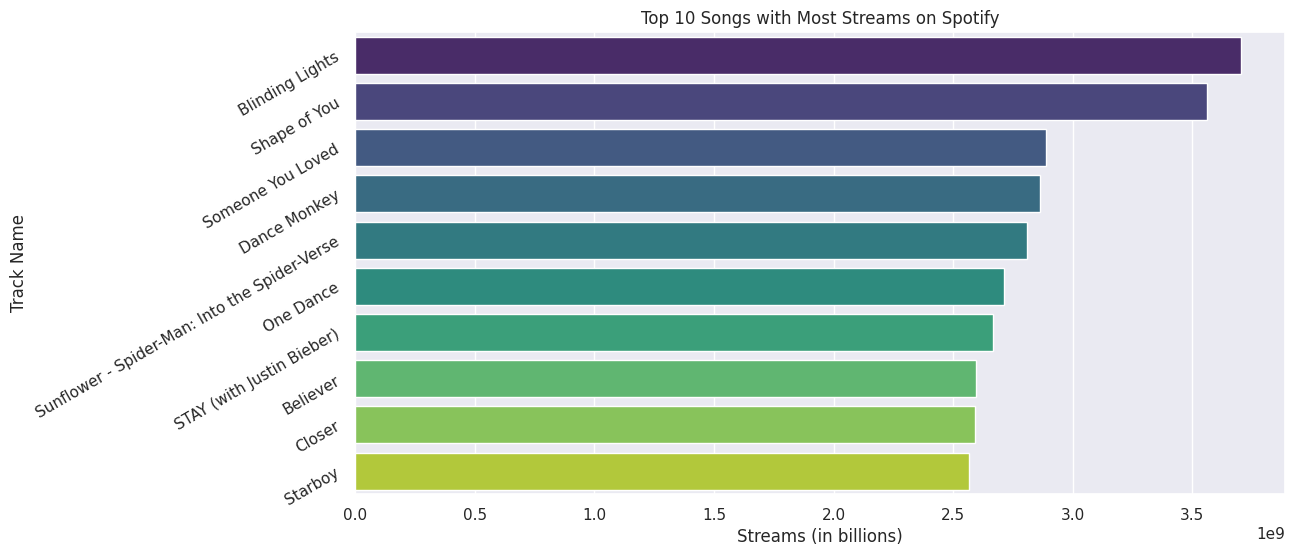

In [55]:
# Top 10 songs with most streams on Spotify
top_spotify_streams = (
    df[['track_name', 'artist(s)_name', 'streams']]
).sort_values(by='streams', ascending=False).head(10)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot using Seaborn barplot
sns.barplot(x=top_spotify_streams['streams'], y=top_spotify_streams['track_name'],
            palette='viridis', ax=ax)

# Set labels and title
ax.set_xlabel('Streams (in billions)')
ax.set_ylabel('Track Name')
ax.set_title('Top 10 Songs with Most Streams on Spotify')
ax.set_yticklabels(ax.get_yticklabels(), rotation=30, ha='right')

# Show the plot
plt.show()

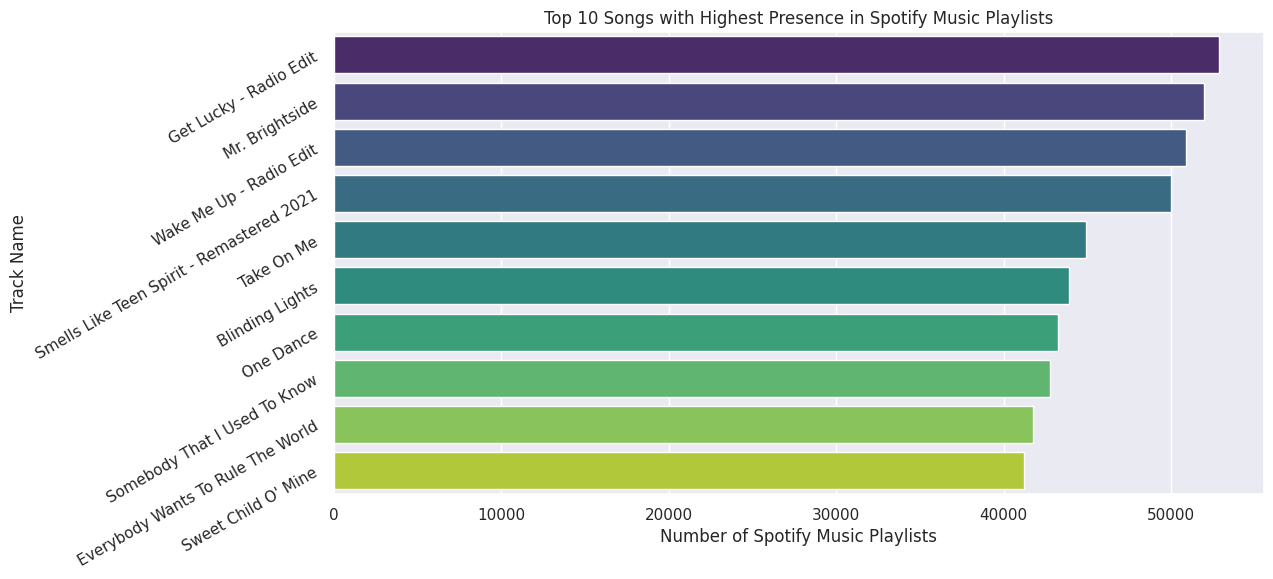

In [56]:
# Top 10 songs with highest presence in Spotify Music Playlists
top_spotify_playlists = (
    df[['track_name', 'artist(s)_name', 'in_spotify_playlists']]
).sort_values(by='in_spotify_playlists', ascending=False).head(10)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot using Seaborn barplot
sns.barplot(x=top_spotify_playlists['in_spotify_playlists'],
            y=top_spotify_playlists['track_name'], palette='viridis', ax=ax)

# Set labels and title
ax.set_xlabel('Number of Spotify Music Playlists')
ax.set_ylabel('Track Name')
ax.set_title('Top 10 Songs with Highest Presence in Spotify Music Playlists')
ax.set_yticklabels(ax.get_yticklabels(), rotation=30, ha='right')

# Show the plot
plt.show()

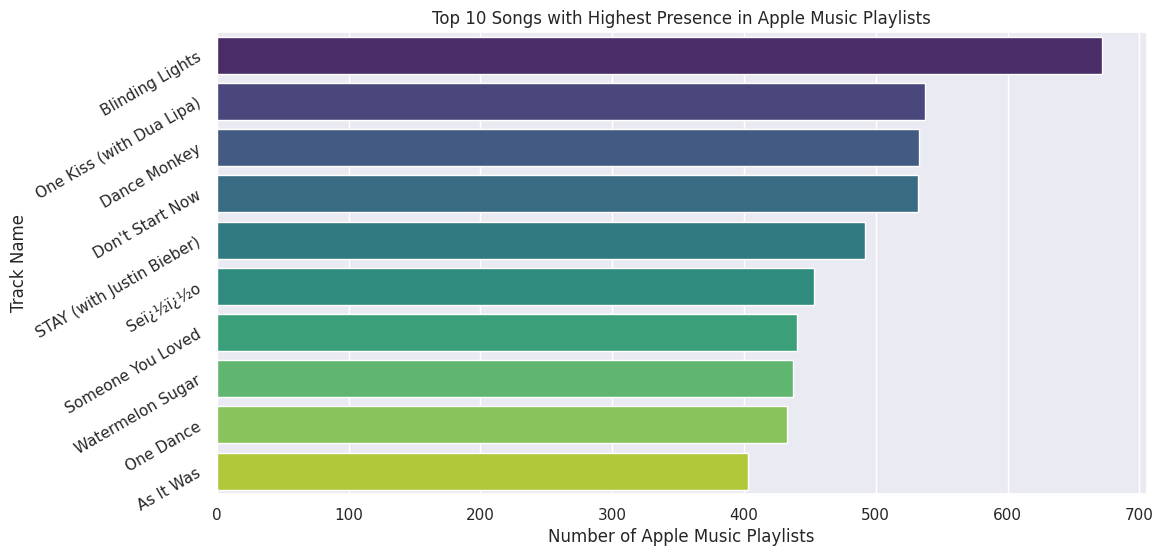

In [57]:
# Top 10 songs with highest presence in Apple Music Playlists
top_apple_playlists = (
    df[['track_name', 'artist(s)_name', 'in_apple_playlists']]
).sort_values(by='in_apple_playlists', ascending=False).head(10)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot using Seaborn barplot
sns.barplot(x=top_apple_playlists['in_apple_playlists'],
            y=top_apple_playlists['track_name'], palette='viridis', ax=ax)

# Set labels and title
ax.set_xlabel('Number of Apple Music Playlists')
ax.set_ylabel('Track Name')
ax.set_title('Top 10 Songs with Highest Presence in Apple Music Playlists')
ax.set_yticklabels(ax.get_yticklabels(), rotation=30, ha='right')

# Show the plot
plt.show()

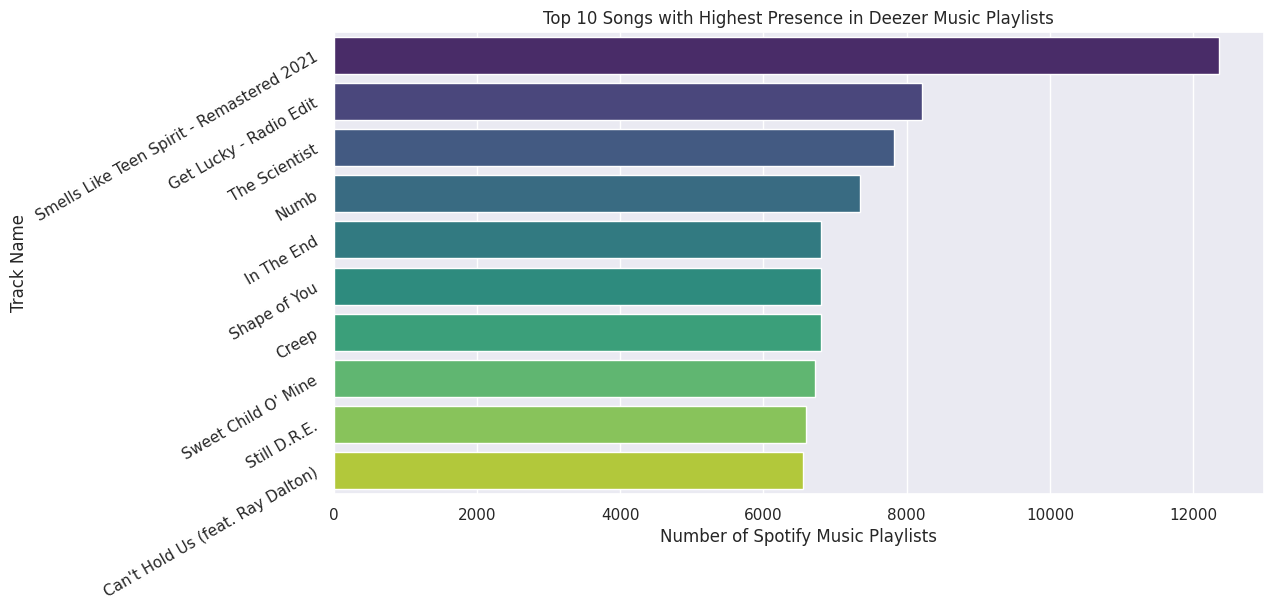

In [58]:
# Top 10 songs with highest presence in Deezer Music Playlists
top_deezer_playlists = (
    df[['track_name', 'artist(s)_name', 'in_deezer_playlists']]
).sort_values(by='in_deezer_playlists', ascending=False).head(10)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot using Seaborn barplot
sns.barplot(x=top_deezer_playlists['in_deezer_playlists'],
            y=top_deezer_playlists['track_name'], palette='viridis', ax=ax)

# Set labels and title
ax.set_xlabel('Number of Spotify Music Playlists')
ax.set_ylabel('Track Name')
ax.set_title('Top 10 Songs with Highest Presence in Deezer Music Playlists')
ax.set_yticklabels(ax.get_yticklabels(), rotation=30, ha='right')

# Show the plot
plt.show()

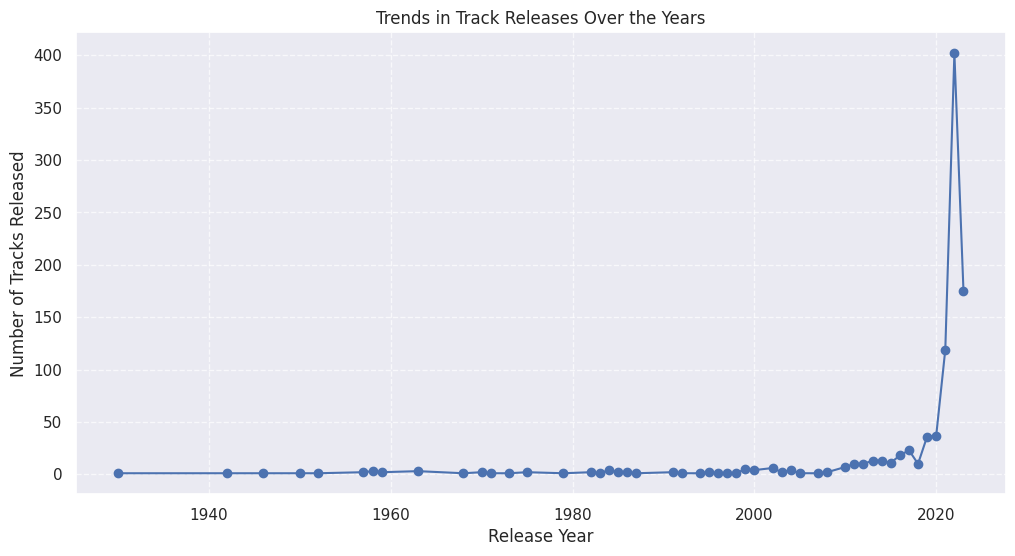

In [59]:
df['release_date'] = pd.to_datetime(df['released_year'].astype(str) + '-' + df['released_month'].astype(str) + '-' + df['released_day'].astype(str), errors='coerce')
df['release_date'] = pd.to_datetime(df['release_date'])

df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

release_year_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(release_year_counts.index, release_year_counts.values, marker='o', linestyle='-')
plt.xlabel('Release Year')
plt.ylabel('Number of Tracks Released')
plt.title('Trends in Track Releases Over the Years')
plt.grid(True, linestyle='--', alpha=0.7)



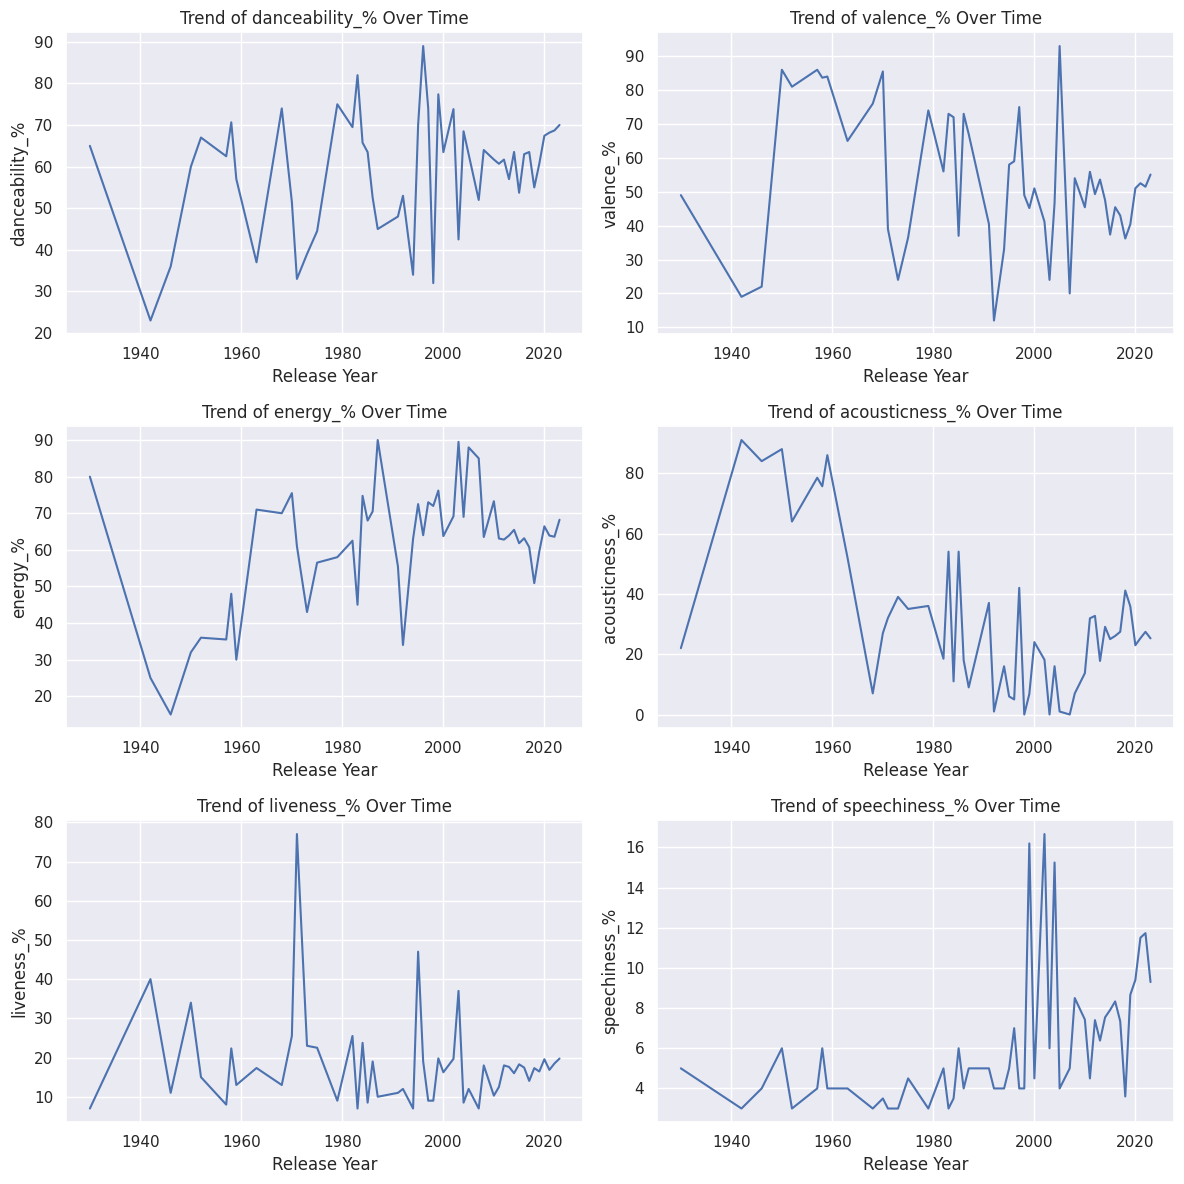

In [60]:


audio_features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'liveness_%', 'speechiness_%']
audio_features_by_year = df.groupby('release_year')[audio_features].mean().reset_index()


plt.figure(figsize=(12, 12))

for i, feature in enumerate(audio_features, start=1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns of subplots
    sns.lineplot(data=audio_features_by_year, x='release_year', y=feature)
    plt.xlabel('Release Year')
    plt.ylabel(feature)
    plt.title(f'Trend of {feature} Over Time')
    plt.grid(True)

plt.tight_layout()
plt.show()



### Correlation Matrix of Numerical Attributes

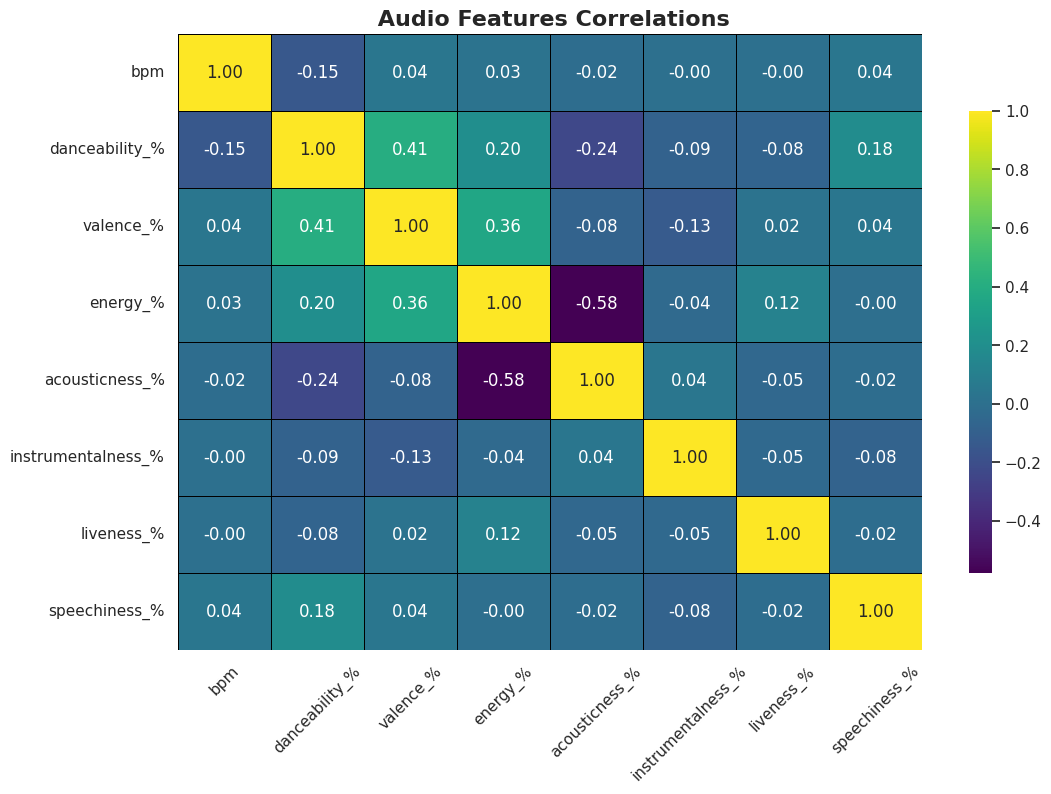

In [61]:
# Select the features for correlation analysis
features = df[['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
c_m = features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(c_m, annot=True, fmt=".2f", linewidths=0.4, linecolor='black',
            cmap='viridis', cbar=True, cbar_kws={'shrink': 0.75})

plt.title(' Audio Features Correlations', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)

plt.show()

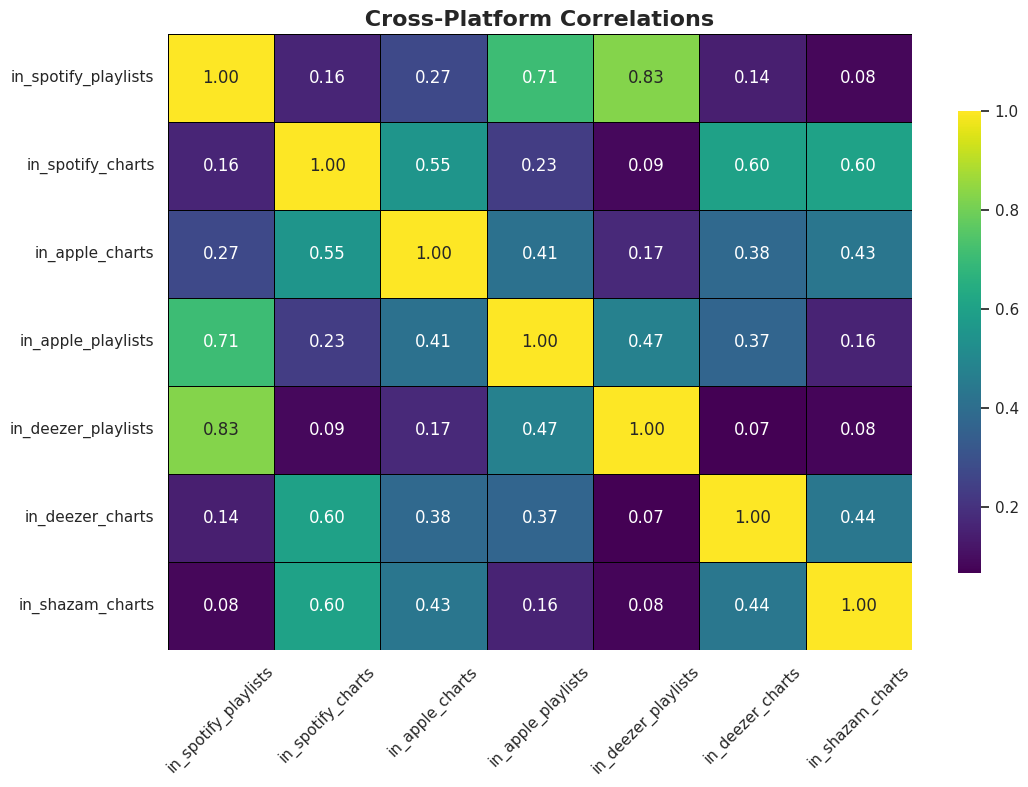

In [62]:
platforms = df[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_charts',
                'in_apple_playlists', 'in_deezer_playlists',
                'in_deezer_charts', 'in_shazam_charts']]

c_m = platforms.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(c_m, annot=True, fmt=".2f", linewidths=0.4, linecolor='black',
            cmap='viridis', cbar=True, cbar_kws={'shrink': 0.75})
plt.title(' Cross-Platform Correlations ', fontsize=16, fontweight='bold')

plt.xticks(rotation=45)

plt.show()